<a href="https://colab.research.google.com/github/CamNorman/BT-Career-Artifact/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
display(penguins.head())

# Find the number of classes in species
penguins['species'].unique()
penguins.shape

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


(344, 7)

In [ ]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
island = penguins.island[:, np.newaxis]
enco = OneHotEncoder(sparse_output= False)
lander = enco.fit_transform(island)
lander[::25]

<ipython-input-13-1db59db91750>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  island = penguins.island[:, np.newaxis]


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
# Imports
import numpy as np

# Select and reshape input array
species = penguins.species[:, np.newaxis]

# Import the encoder
from sklearn.preprocessing import OneHotEncoder

# Instantiate the encoder as an object
enc = OneHotEncoder(sparse_output=False)

# Use the fit_transform method (2 steps in 1)
onehot = enc.fit_transform(species)

# Display every 25th row
onehot[::25]

<ipython-input-9-13b6ea09431f>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  species = penguins.species[:, np.newaxis]


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
#Univariate feature selection process

In [ ]:
# Import pandas and seaborn
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data into a DataFrame
penguins = sns.load_dataset("penguins")

# Drop NaNs
penguins.dropna(inplace=True)

# Create the features matrix
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X = penguins[features]

# Create the target array
y = penguins['body_mass_g']

# Import the train_test_split utility
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
# Import the feature selector utility
from sklearn.feature_selection import SelectKBest, f_regression

# Create the selector object with the best k=1 features
selector = SelectKBest(score_func=f_regression, k=1)

# Run the selector on the training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Find the features that was selected
selected_mask = selector.get_support()
all_features = X_train.columns
selected_feature = all_features[selected_mask]

print('The selected feature: ', selected_feature[0])
print(selected_mask)
print(all_features)


The selected feature:  flipper_length_mm
[False False  True]
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], dtype='object')


In [ ]:
#Intuition and interpretation of ridge regresion

In [ ]:
# Generate the practice data set
import numpy as np

np.random.seed(15)
x = 5 * np.random.rand(50)
y = abs(0.5*np.sin(x) + 0.5 * np.random.rand(50))*10

# Create the feature matrix
X = x[:, np.newaxis]

# Fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Create the data for the model (best-fit line)
xfit = np.linspace(0, 5, 1000)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)


In [ ]:
# Fit a linear regression with polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(15),
                           LinearRegression())

# Create the data for the model (best-fit line)
poly_model.fit(x[:, np.newaxis], y)
yfit_poly = poly_model.predict(xfit[:, np.newaxis])


In [ ]:
# Fit a ridge regression with polynomial features
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

ridge_model = make_pipeline(PolynomialFeatures(15),StandardScaler(),Ridge(alpha = 0.005))


ridge_model.fit(x[:, np.newaxis], y)

# Create the data for the model (best-fit line)
yfit_ridge = ridge_model.predict(xfit[:, np.newaxis])


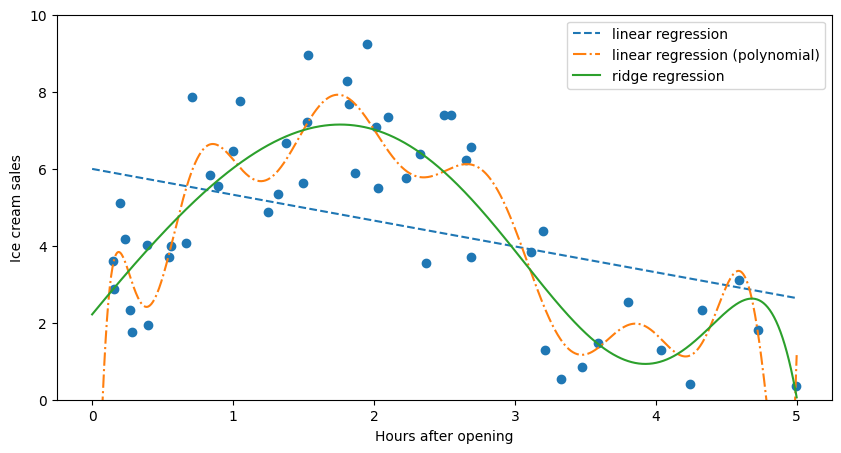

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)

ax.plot(xfit, yfit, linestyle='--', label='linear regression')
ax.plot(xfit, yfit_poly, linestyle = '-.', label='linear regression (polynomial)')
ax.plot(xfit, yfit_ridge, label='ridge regression')

ax.set_ylim([0, 10])

ax.set_xlabel('Hours after opening')
ax.set_ylabel('Ice cream sales')
ax.legend();

#fig.clf()